In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pymatgen as pymat
%matplotlib inline
#from biokit.viz import corrplot
from sklearn import linear_model, ensemble, gaussian_process
import seaborn as sns
from sklearn import metrics, decomposition, datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.grid_search import GridSearchCV
from scipy.interpolate import UnivariateSpline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle, resample
from scipy.stats.kde import gaussian_kde
from sklearn.kernel_ridge import KernelRidge
from numpy import loadtxt
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

plt.rcParams['font.size'] = 24
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['axes.linewidth'] = 6.0


#File Imports
filePath = ''  # (° ͜ʖ ͡°) 
df_train = pd.read_csv(filePath + 'data/equip_failures_training_set.csv')
df_test = pd.read_csv(filePath + 'data/equip_failures_test_set.csv')

In [215]:
df_train.replace('na', 'nan', inplace = True)
df_test.replace('na', 'nan', inplace = True)

In [216]:
df_train1=df_train[df_train['target']==1]
df_train0=df_train[df_train['target']==0]

In [217]:
seed = np.random.RandomState(seed=None)
df_train0=df_train0.sample(n = df_train1.shape[0], replace = False, random_state=seed);
df_train_rs = pd.concat([df_train0, df_train1], axis=0)
filter_col = [col for col in df_train_rs if col.startswith('sensor')]
descriptors = df_train_rs[filter_col].astype('float32')
target=df_train_rs["target"].astype('float32')

In [194]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(descriptors)
imp_descriptors=pd.DataFrame(imp_mean.transform(descriptors))
imp_descriptors.shape

(2000, 170)

In [273]:
fi_all = pd.DataFrame()
acc_all = []

#All regressors for important features
plt.rcParams['figure.figsize'] = (50,30)
plt.rcParams['font.size'] = 30
imp_features_all=[]
modelz=[#ensemble.GradientBoostingClassifier(learning_rate= .1, max_depth= 6, n_estimators= 300, random_state=1234),
        XGBClassifier(learning_rate=.1, max_depth=10, n_estimators=400, random_state=1234, subsample=0.57,objective='reg:squarederror'),
        #ensemble.RandomForestClassifier(n_estimators=100, max_depth=30,random_state=2)
        ]
y=target
X=descriptors#.iloc[:,0:100]
for mo in modelz:
    print('\nChosen Model: ', mo)
    for i in range(10):#59?
        seed = np.random.RandomState(seed=None)
        df_train0=df_train0.sample(n = df_train1.shape[0], replace = False, random_state=seed);
        df_train_rs = pd.concat([df_train0, df_train1], axis=0)
        filter_col = [col for col in df_train_rs if col.startswith('sensor')]
        descriptors = df_train_rs[filter_col].astype('float32')
        target=df_train_rs["target"].astype('float32')


        clf = mo

        print('')
        # split data into train and test sets
        test_size = 0.20
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        feature_importance = clf.feature_importances_
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        fi_all[i]=feature_importance
        acc_all.append(accuracy)

        
        print("Accuracy: %.2f%%" % (accuracy * 100.0))


Chosen Model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.57, verbosity=1)

Accuracy: 96.50%

Accuracy: 96.00%

Accuracy: 96.00%

Accuracy: 96.00%

Accuracy: 96.00%

Accuracy: 96.50%

Accuracy: 96.00%

Accuracy: 96.50%

Accuracy: 96.00%

Accuracy: 96.75%


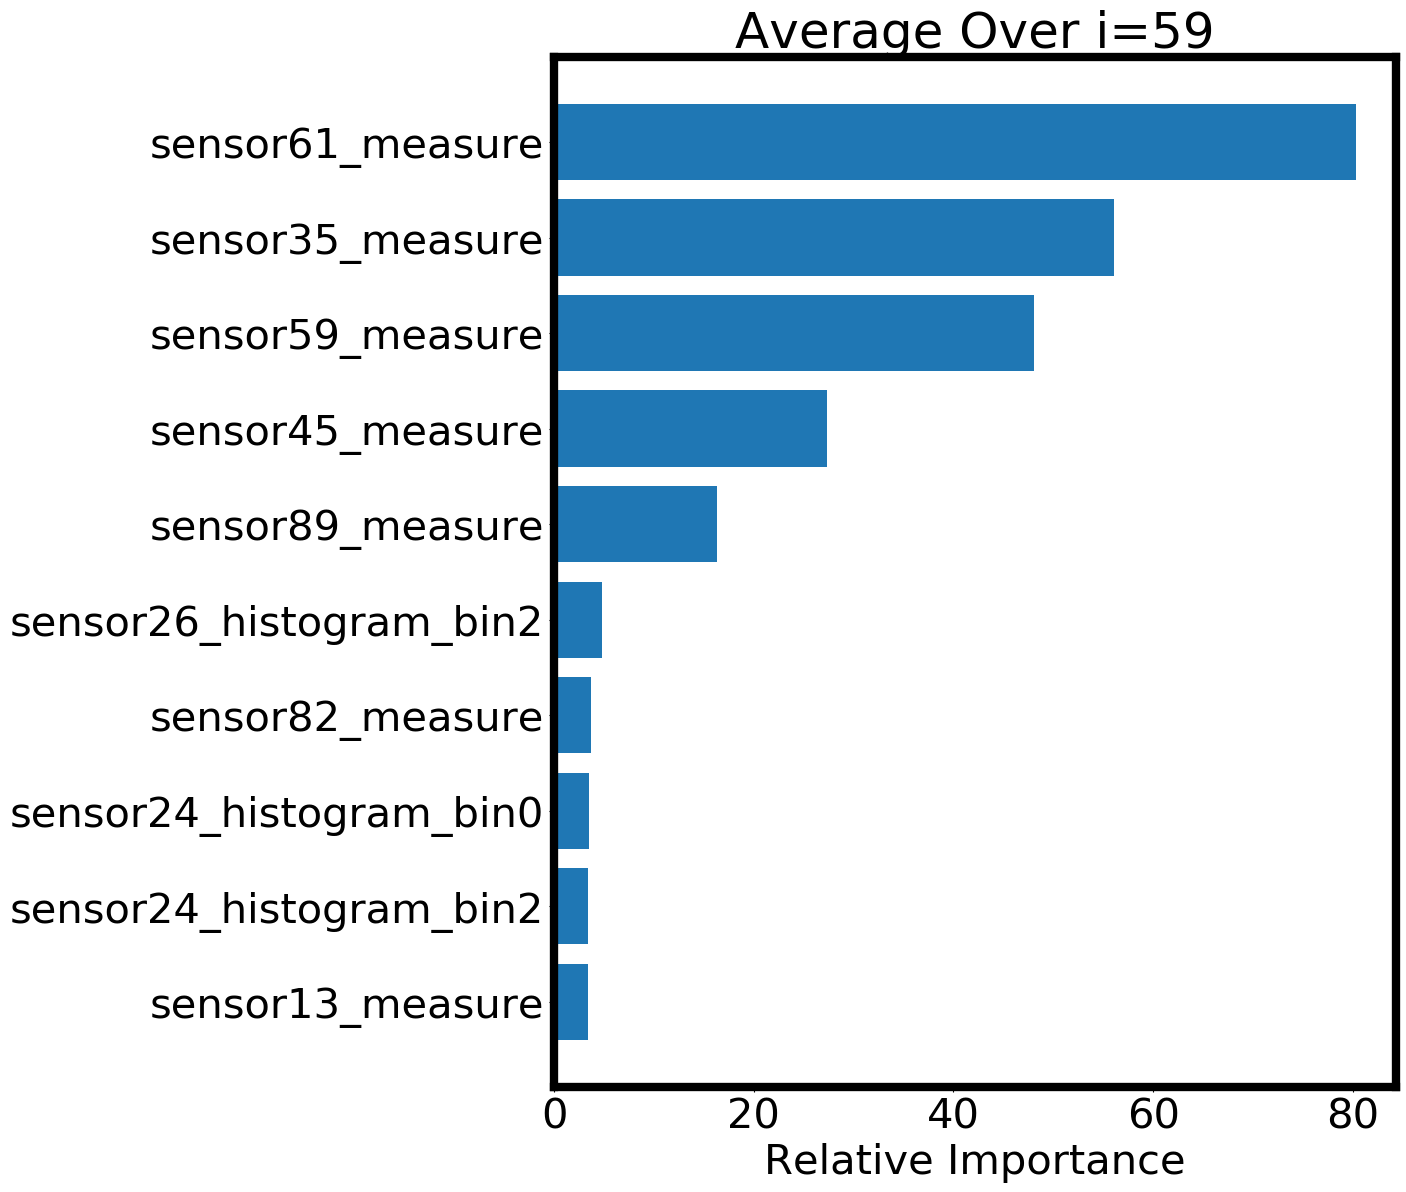

In [274]:
fi_norm=fi_all*acc_all/np.sum(acc_all)
fi_avg=fi_norm.sum(axis=1)
sorted_idx = np.argsort(fi_avg)[X.shape[1]-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
imp_features=X.columns[sorted_idx]
imp_features_all.append(imp_features)


plt.subplot(2, 4, 2*count+2)
plt.barh(pos, fi_avg[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Average Over i=59')
plt.show()

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



figure = plt.figure(figsize=(27, 9))
# preprocess dataset, split into training and test part
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

IndentationError: unexpected indent (<ipython-input-98-3981f2e83e58>, line 39)

In [27]:
from autofeat import FeatureSelector, AutoFeatRegression
%load_ext autoreload
#%autoreload 2
%reload_ext autoreload

fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X, y)
print(new_X.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[featsel] Scaling data...done.
[featsel] 32/59 features after univariate filtering
[featsel] Feature selection run 1/3
[featsel] Feature selection run 2/3
[featsel] Feature selection run 3/3
[featsel] 19 features after 3 feature selection runs
[featsel] 19 features after correlation filtering
[featsel] 13 features after noise filtering
[featsel] 13 final features selected (including 0 original keep features).
Index(['Cr(at%)', 'Sn(at%)', 'Fe(at%)', 'Nb(at%)', 'Pt(at%)', 'Ta(at%)',
       'Ni(at%)', 'Cu(at%)', 'MolV', 'MedN', 'FinalHT_Time', 'HF_Temp',
       'Boil'],
      dtype='object')


In [ ]:
for steps in range(5):
    print("### AutoFeat with %i feateng_steps" % steps)
    afreg = AutoFeatRegression(verbose=1, feateng_steps=steps)
    df = afreg.fit_transform(X, y)
    r2 = afreg.score(X, y)
    print("## Final R^2: %.4f" % r2)
    plt.figure()
    plt.scatter(afreg.predict(X), y, s=2);
    plt.title("%i feateng steps (R^2: %.4f)" % (steps, r2))

### AutoFeat with 0 feateng_steps
[AutoFeatRegression] The 0 step feature engineering process could generate up to 59 features.
[AutoFeatRegression] With 1267 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Warning: no features generated for max_steps < 1.
[featsel] Scaling data...done.
[featsel] 59/59 features after univariate filtering
[featsel] Feature selection run 1/3
[featsel] Feature selection run 2/3
[featsel] Feature selection run 3/3
[featsel] 59 features after 3 feature selection runs
[featsel] 59 features after correlation filtering
[featsel] 13 features after noise filtering
[featsel] 59 final features selected (including 59 original keep features).
[AutoFeatRegression] Training final regression model.
[AutoFeatRegression] Trained model: largest coefficients:
-852.491584983949
-23.655575 * Fe(at%)
-20.870563 * Cr(at%)
-17.819588 * Sc(at%)
-13.850184 * Sn(at%)
10.377596 * Si(at%)
-9.195863 * Mn(at%)
8.481511 * Pt(at%)
6.887963 * Pr(at%)
-6.38

In [120]:
modelz=[#ensemble.GradientBoostingRegressor(learning_rate= 0.01, max_depth= 31, n_estimators= 300, random_state=1234,min_samples_split=.05),#check with HyperOpt
        XGBRegressor(learning_rate=.05, max_depth=31, n_estimators=400, random_state=1234, subsample=0.57,objective='reg:squarederror',),#done
        #ensemble.RandomForestRegressor(max_depth= 38,max_features=18, n_estimators= 230, random_state=1234),#done
       ]

# descriptors = np.delete(descriptors, np.argwhere(descriptors=='Ti(at%)'))
# grid=grid[descriptors]

n_test=len(grid)
n_repeat= 100;
targets=["Ms","Af"]
#targets=["Mf","epsilonAct(%)"]
predictedtar=pd.DataFrame()
n_score=[]

#exp_features=list(grid.columns[0:30])
nfeatures=len(exp_features)
nn=n_repeat+nfeatures



#prpt_best=[46.0173913] # find max automagically
# prpt_target=[90,25,10,10]
# prpt_range=[5,5,10,10]
prpt_target=[110,10]
prpt_range=[1000,1000]

pred = np.zeros((len(targets), n_test, n_repeat))

for i, name in enumerate(targets):
    print('')
    print('Fitting the data for: ', name)
    cols=np.append(descriptors, name) 
    df1=df[cols]
    df1=df1.dropna(axis=0, how='any')
    print('number of data points=', len(df1))

    y=df1[name]
    #X=df1[imp_features]
    X=df1[descriptors]
    prpt_low=prpt_target[i]-prpt_range[i]
    prpt_high=prpt_target[i]+prpt_range[i]
    test_r2_all=[]
    predictedmomean=pd.DataFrame()
    predictedmostd=pd.DataFrame()
    for mo in modelz:
        print('\nChosen Model: ', mo)

        train_r2=[]
        test_r2=[]
        
        for j in range(n_repeat):

            Xnew, ynew= resample(X, y,random_state=j)
            X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew,test_size=0.20, random_state=1234)

            mo.fit(X_train, y_train)
        
            y_train_pred = mo.predict(X_train)
            y_test_pred = mo.predict(X_test)
            
            train_r2 = np.append(train_r2, metrics.r2_score(y_train, y_train_pred))
            test_r2 = np.append(test_r2,metrics.r2_score(y_test, y_test_pred))
#            y_pred_grid=mo.predict(grid[imp_features])
            y_pred_grid=mo.predict(grid[descriptors])
            pred[i, :, j]=y_pred_grid
            
#             predicted[str(mo)[:5]+'_'+name]=pred[i].ravel()
        print('')
        print('Train R2 Average: ',np.mean(train_r2))
        print('Test R2 Average: ',np.mean(test_r2))
        test_r2_all=np.append(test_r2_all,np.mean(test_r2))
        predictedi=pd.DataFrame(pred[i,:,:])
        
        predictedmomean[str(mo)[:5]+name+' Mean']=predictedi.mean(axis=1)
        predictedmostd[str(mo)[:5]+name+' Std']=predictedi.iloc[predictedi.index].std(axis=1)
    print('')
    print('Downselecting the data for: ',name)

    maximum = df.loc[df[name].idxmax()]
    maximum = maximum[name]
    prpt_best=[maximum] # find max automagically
    #predicted1=pd.DataFrame(pred[i,:,:])
    #Weighting means by the R2 score of model
    for o in range(len(modelz)):
        predictedmomean.iloc[:,o]*=(test_r2_all[o]/np.sum(test_r2_all))
        predictedmostd.iloc[:,o]*=(test_r2_all[o]/np.sum(test_r2_all))
    predictedtar[name+' Mean']=predictedmomean.sum(axis=1)
    predictedtar[name+' Std']=predictedmostd.sum(axis=1)
    
    prpt_low=prpt_target[i]-prpt_range[i]
    prpt_high=prpt_target[i]+prpt_range[i]
    predictedtar=predictedtar[(predictedtar[name+' Mean'] > prpt_low ) &  (predictedtar[name+' Mean'] < prpt_high )]
#    predictedtar[name+' Z']= (predictedtar[name+' Mean'] - prpt_best[0])/predictedtar[name+' Std']
    alldata=pd.concat([grid.iloc[predictedtar.index,0:nfeatures], predictedtar], axis=1).reset_index(drop=True)

#     kde = gaussian_kde(alldata[name+' Z'])
#     ei=[]
#     for ii in range(len(alldata)):
#         Zvalue=alldata[name+' Z'][ii]
#         sigma=alldata[name+' Std'][ii]
#         ei.append(sigma*(kde.evaluate(Zvalue)[0]+Zvalue*kde.integrate_box_1d(-200,Zvalue)))

    #ei=pd.DataFrame(ei, columns=[name+' EI'])
    #alldata[name+' EI']=ei
    #alldata=pd.concat([alldata, ei], axis=1)

  #**************



    alldata=alldata.rename(columns={0:name})
    print("New Grid Size: ", len(alldata))

    alldata=alldata.reset_index(drop=True)
    grid=alldata
    #grid=grid.dropna(axis=0, how='any')
    pred = np.zeros((len(targets), len(grid), n_repeat))
    
#Drop non-unique columns
# for col in grid.columns:
#     if len(grid[col].unique()) == 1:
#         grid.drop(col,inplace=True,axis=1)
    #predicted=pd.DataFrame()
    #col=exp_features + [name+' Mean', name+' EI']
    
#     print(prpt.sort_values(by=[name+' Mean'], ascending=True)[col].head(5).round(3))
#     print(prpt.sort_values(by=[name+' EI'], ascending=False)[col].head(5).round(3))
#     prpt=prpt.sort_values(by=[str(mo)[:5]+'_'+name+'EI'], ascending=False)[col]


Fitting the data for:  Ms
number of data points= 1131

Chosen Model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=31, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.57, verbosity=1)

Train R2 Average:  0.9927141213908348
Test R2 Average:  0.9388957528413724

Downselecting the data for:  Ms
New Grid Size:  170241

Fitting the data for:  Af
number of data points= 1125

Chosen Model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=31

In [121]:
for col in grid.columns:
    if len(grid[col].unique()) == 1:
        grid.drop(col,inplace=True,axis=1)

In [122]:
grid.head()

,Hf(at%),Ni(at%),Ti(at%),FinalHT_Temp,FinalHT_Time,Mass,Rad,Num,MedN,Boil,Melt,ElecN,MolV,IonR,Ms Mean,Ms Std,Af Mean,Af Std
0,6.0,48.8,45.2,350.0,8.0,6098.76632,138.46,2792.8,5874.8,345644.8,187095.6,170.616,883.16,79.707333,69.563739,17.361238,118.223513,14.584421
1,12.0,46.2,41.8,300.0,12.0,6854.35568,139.49,3077.2,5827.2,354513.2,191039.4,168.214,910.49,79.987667,143.219910,15.152171,180.788792,16.182001
2,16.0,46.0,38.0,550.0,8.0,7374.68240,140.10,3276.0,5820.0,359852.0,193342.0,167.180,922.50,80.003333,207.833537,25.927785,245.258432,19.944886
3,19.0,51.8,29.2,450.0,12.0,7829.34452,140.26,3460.8,5909.8,361630.8,193801.6,168.606,907.41,79.350667,43.952659,16.189419,79.609000,16.304012
4,14.0,51.4,34.6,550.0,7.0,7171.89896,139.53,3208.4,5908.4,355200.4,191061.8,169.658,895.03,79.403667,24.720364,18.060598,74.721382,15.084946


In [123]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

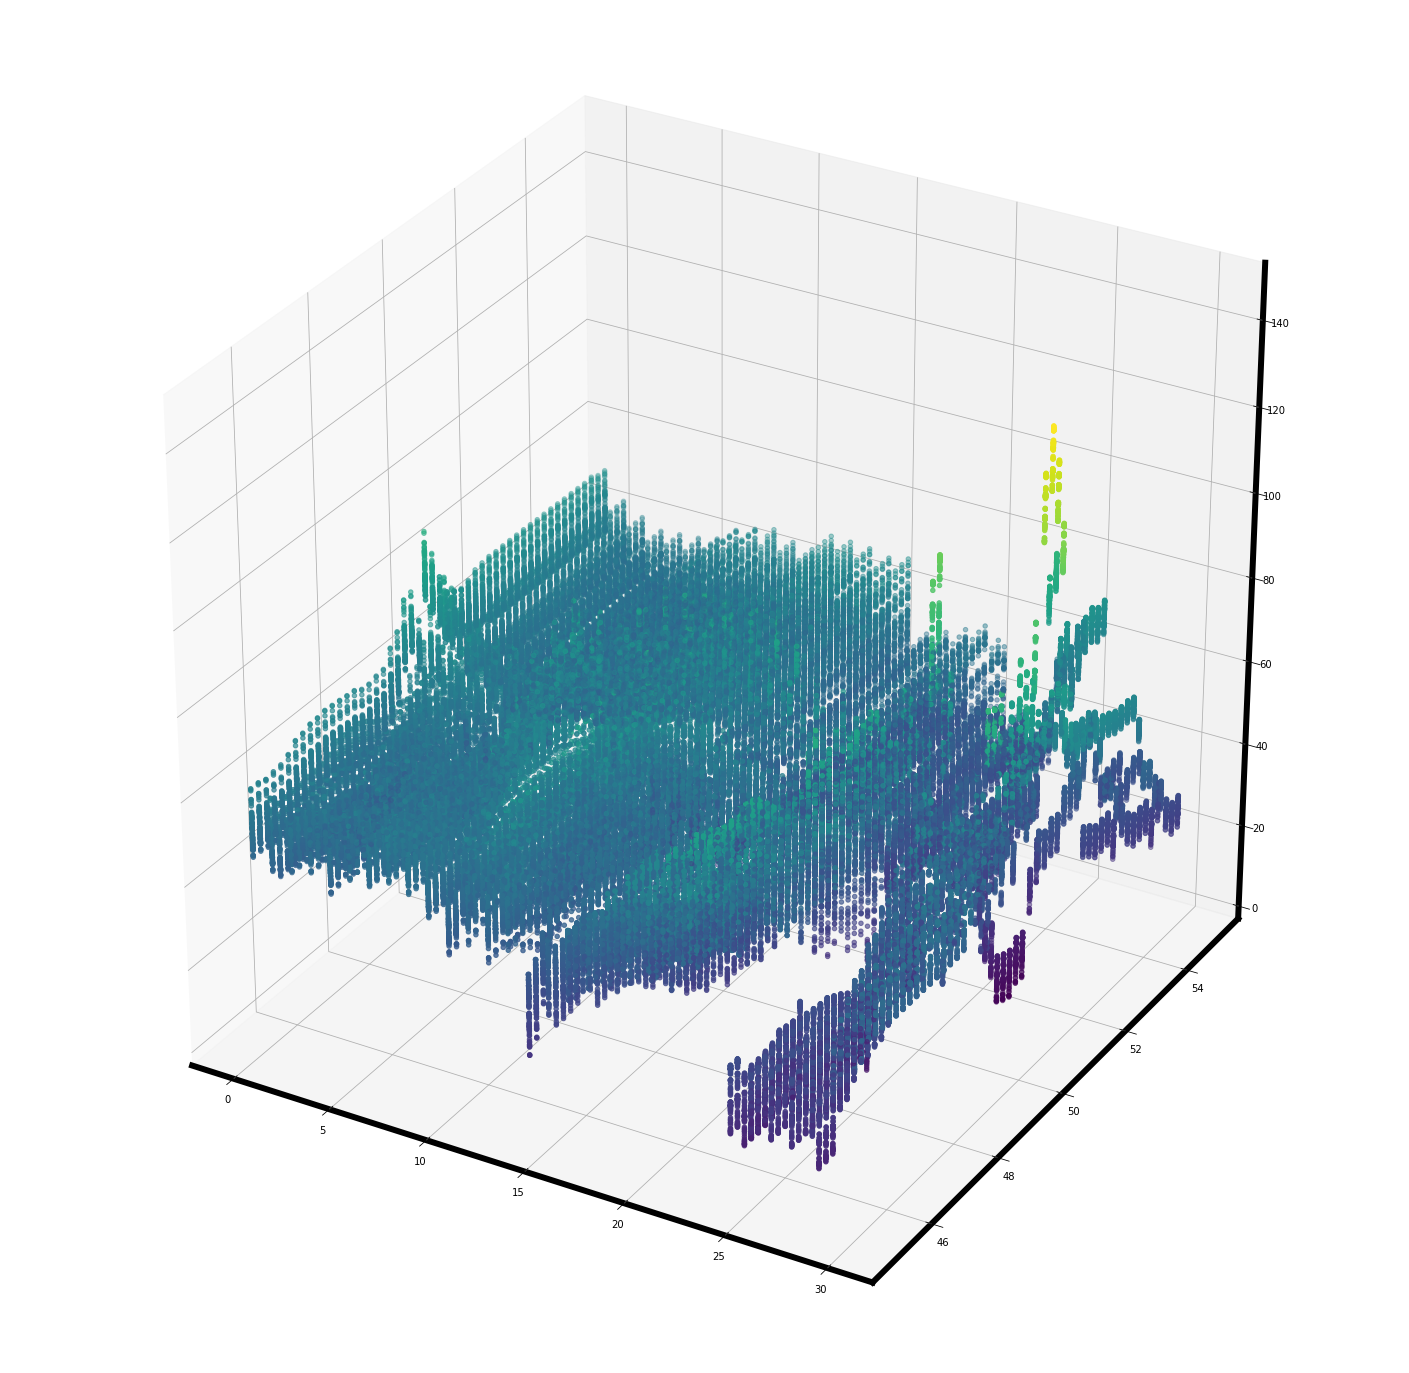

In [138]:
x=grid['Hf(at%)']
y=grid['Ni(at%)']
#z=grid['Thermal_Hysteresis Mean']
z=grid['Af Mean']-grid['Ms Mean']
%matplotlib inline

plt.rcParams['figure.figsize'] = (25,25)

ax = plt.axes(projection='3d')
ax.set_zlim(0,150)
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=1);

<IPython.core.display.Javascript object>


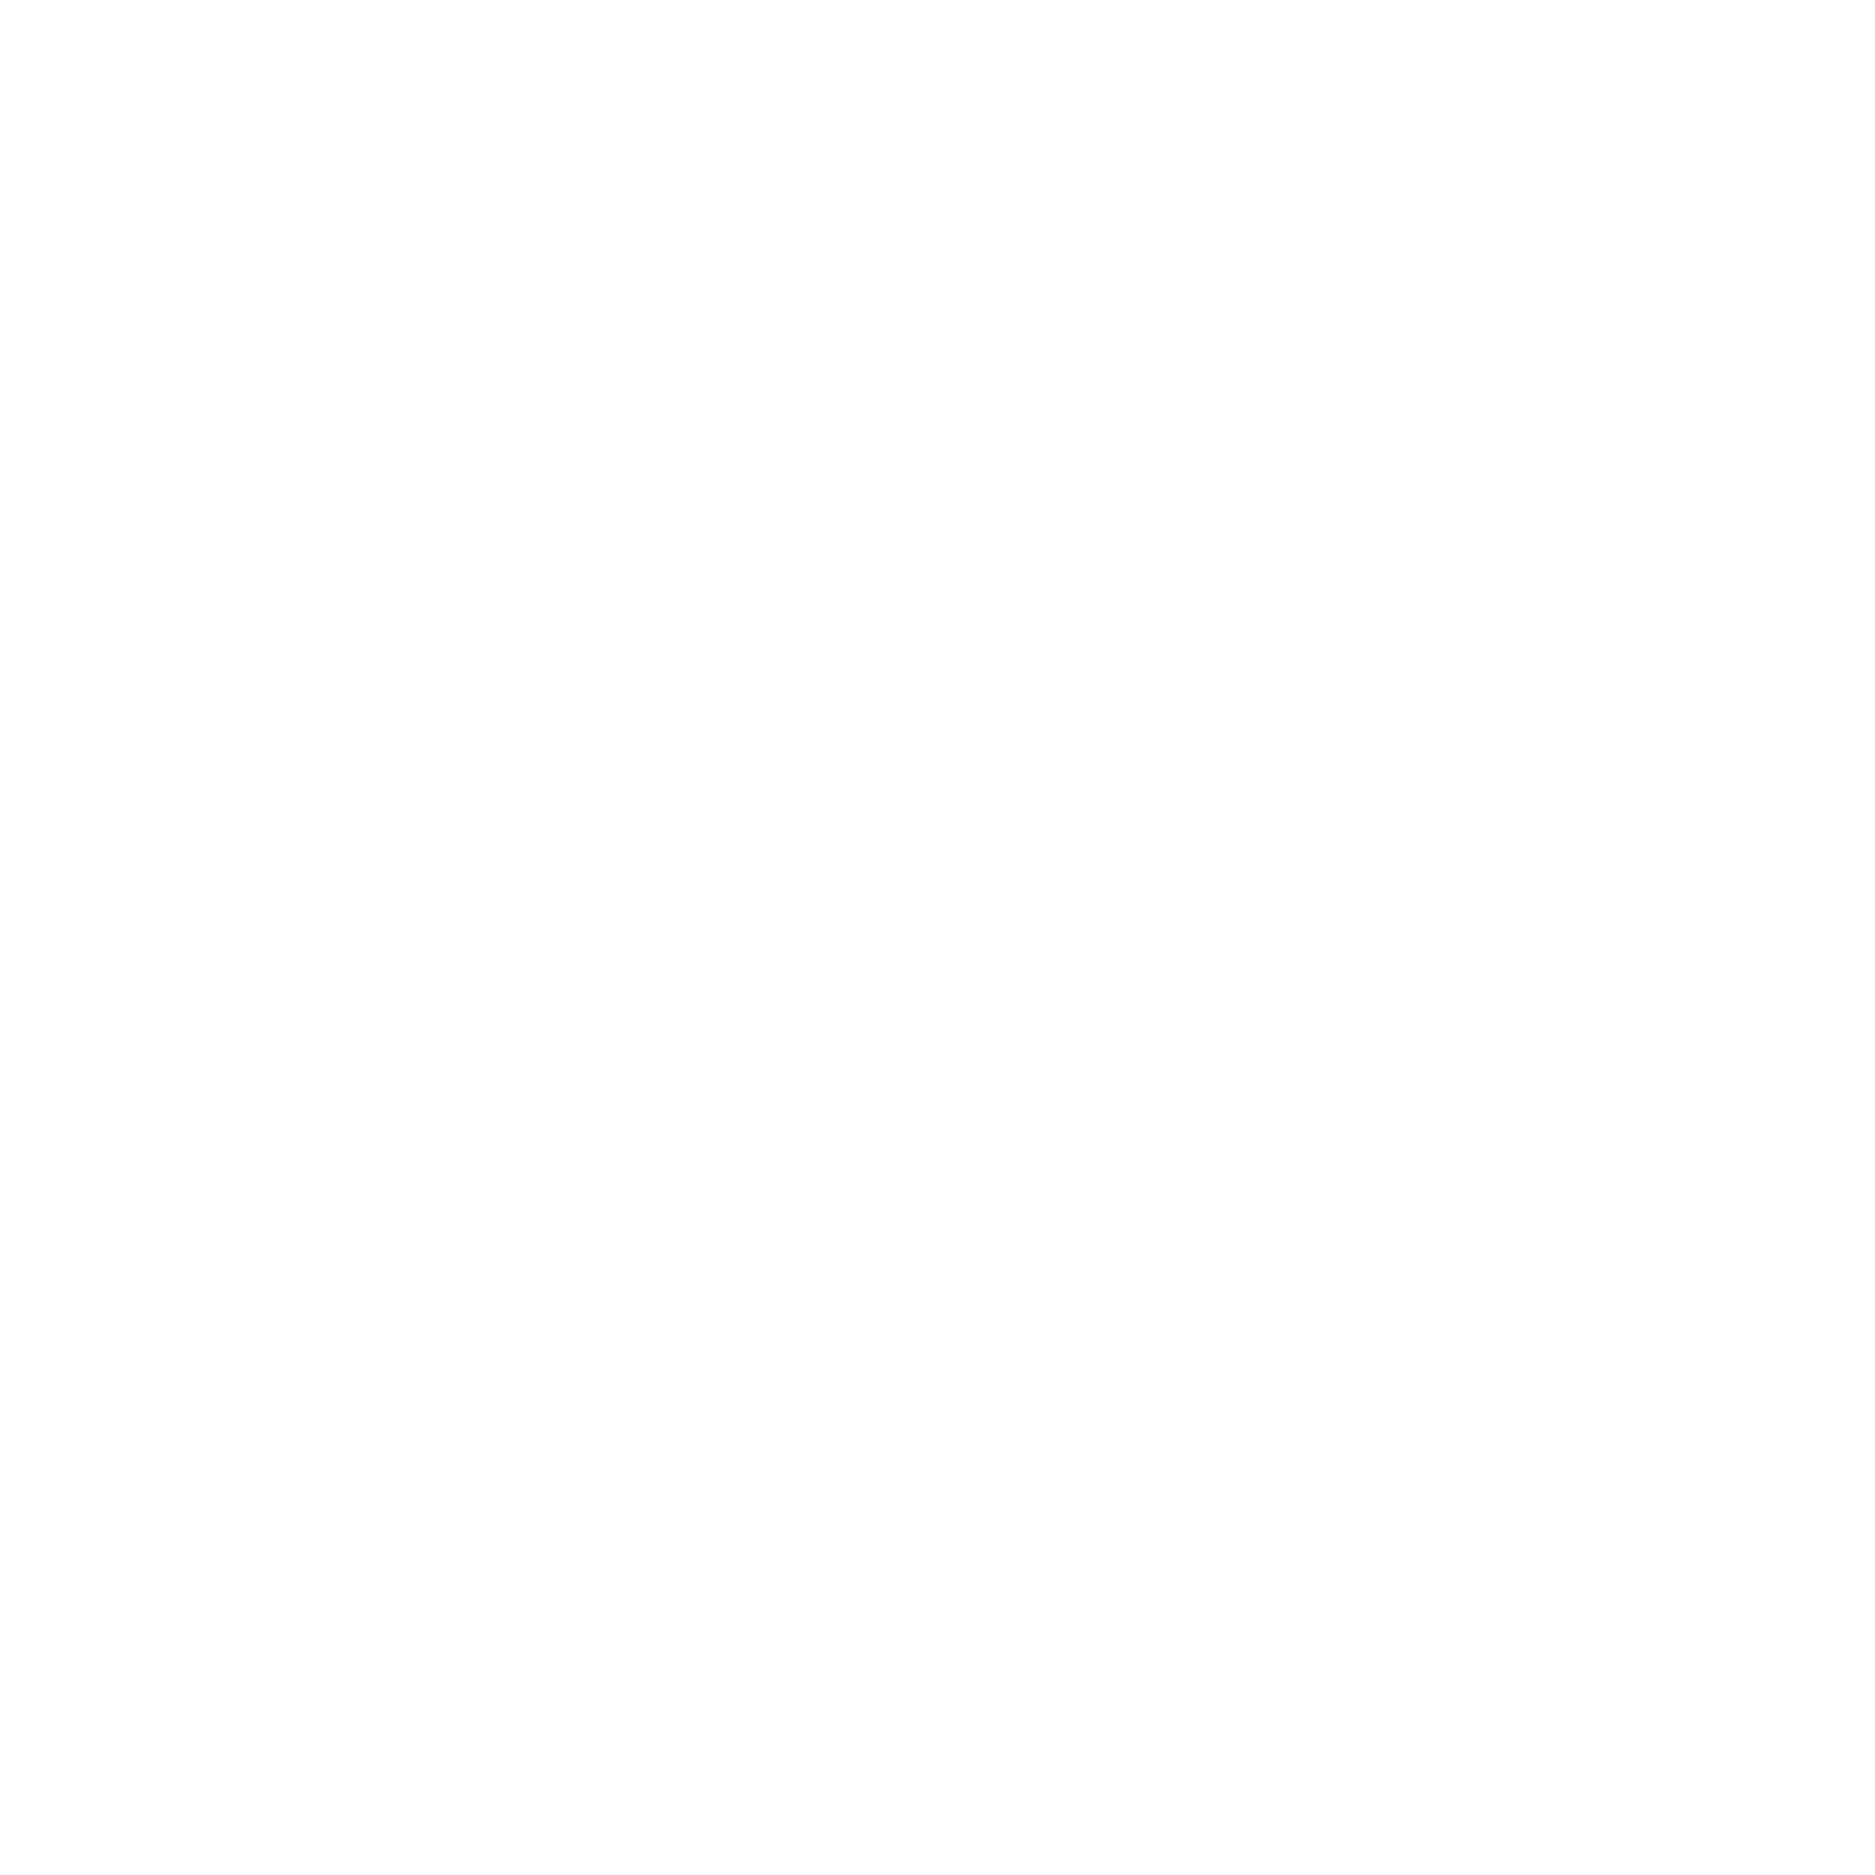

<IPython.core.display.Javascript object>


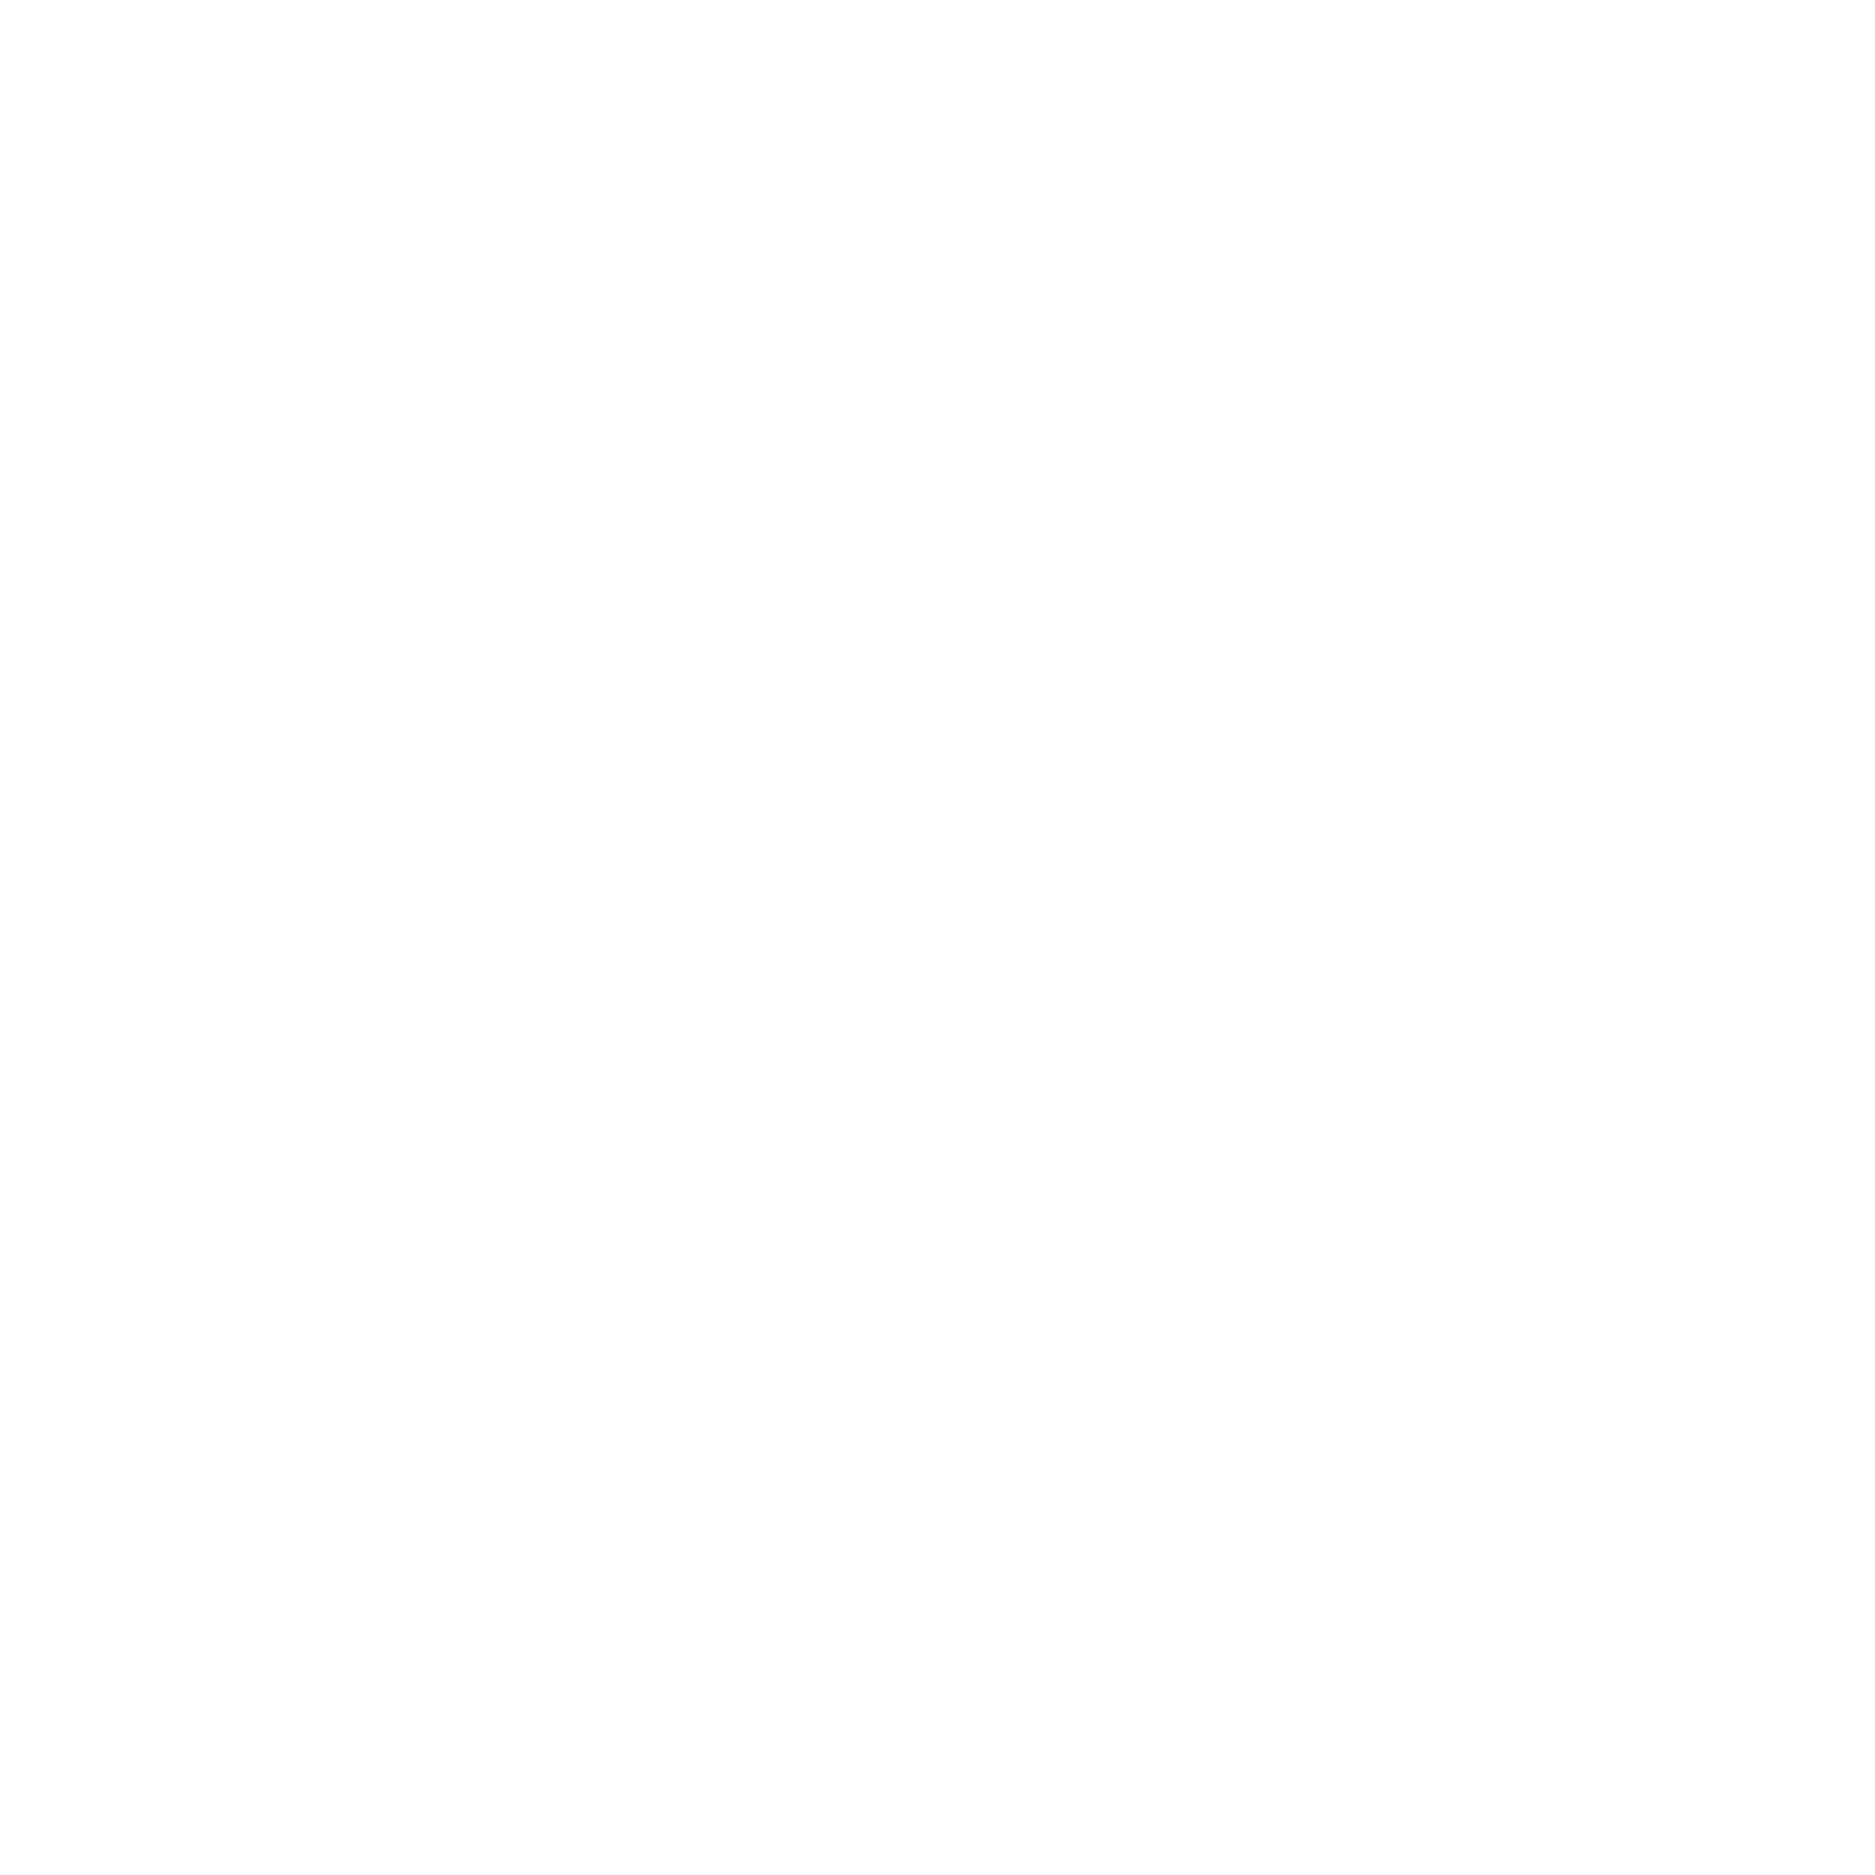

In [137]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook

plt.rcParams['figure.figsize'] = (15,15)
ax = plt.axes(projection='3d')
ax.set_zlim(0,150)
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

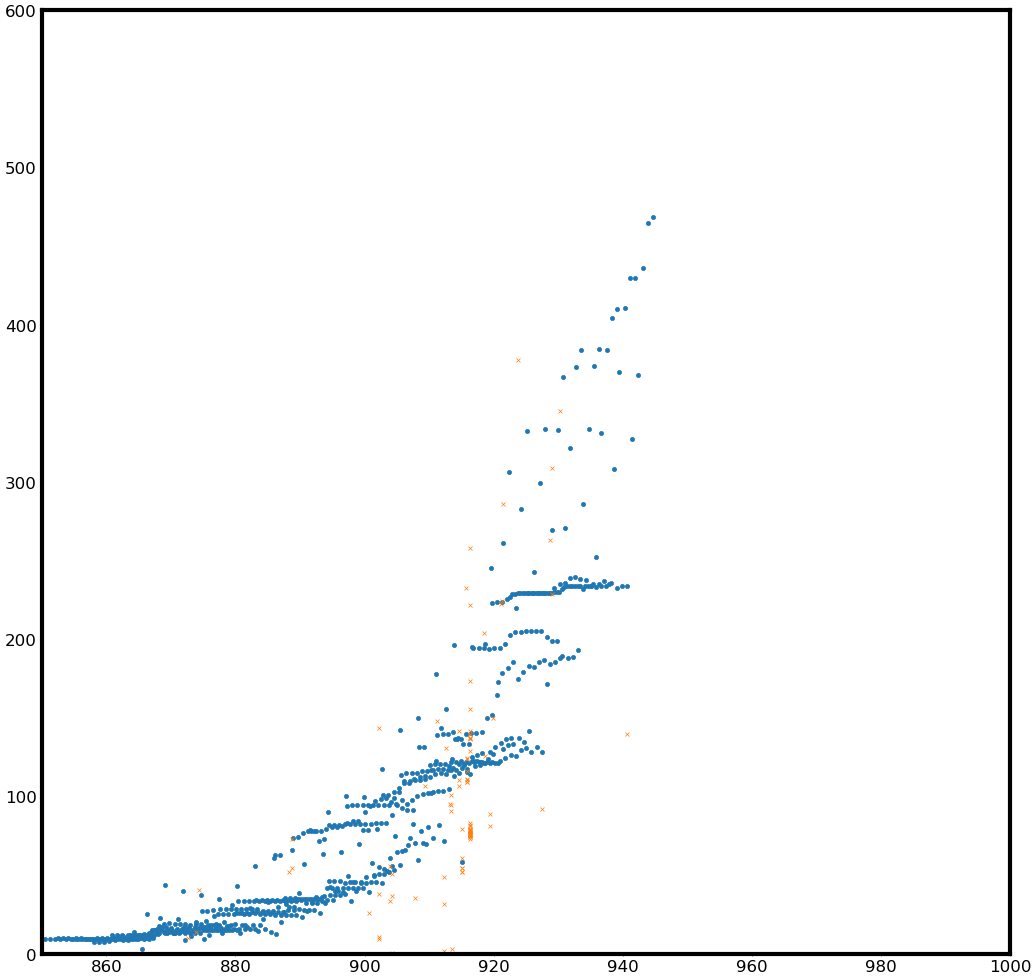

In [102]:
%matplotlib inline
bal=50
gridplt=grid[ grid['Ni(at%)'] >bal ]
plt.rcParams['font.size'] = 24
plt.rcParams['figure.dpi'] = 50
plt.rcParams['figure.figsize'] = (25,25)
plt.rcParams['axes.linewidth'] = 6.0
axes = plt.gca()
axes.set_xlim([850,1000])
axes.set_ylim([0,600])
#grid.plot(x='Hf(at%)', y='Ms Mean', style='o',ax=axes)

y=gridplt["Ms Mean"]#-gridplt['Ms Mean']
x=gridplt['MolV']

dfsg=df[df['Ni(at%)'] >bal ]
dfsg=dfsg[dfsg['Hf(at%)']>0]
dfsg=dfsg[dfsg['Applied_Stress(MPa)']==0]
x2=dfsg['MolV']
y2=dfsg['Ms']
#x=grid['ElecN']*100/grid['Num']
#p = np.poly1d(np.polyfit(x, y, 5))
#t = np.linspace(0, 30, 200)
plt.plot(x, y, 'o')#, t, p(t), '-')
plt.plot(x2,y2,'x')
plt.show()

In [139]:
fileName = ''
for name in grid.columns.values:
    try:
        name.index('(at%)')
        fileName = fileName + name[:2]
        
    except:
        pass
grid.to_csv(fileName+name+'_pred.txt', sep='\t')